<a href="https://colab.research.google.com/github/ArashDehghanyan/Hands-On_Machine_Learning/blob/main/hands_on_ml_example_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(sys.version_info)
assert sys.version_info >= (3, 5)

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)


In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"
print(sklearn.__version__)

1.0.2


In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")
os.makedirs(datapath, exist_ok=True)

In [4]:
# Plots directly pretty figures inside jupiter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [5]:
# Download the data
from urllib import request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("DOWNLOADING:", filename, "...")
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    request.urlretrieve(url, datapath+filename)

DOWNLOADING: oecd_bli_2015.csv ...
DOWNLOADING: gdp_per_capita.csv ...


In [6]:
import pandas as pd

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """Combines two dataset."""
    # Selects the samples that column INEQUALITY is equal to TOT
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
    # Creates a pivot table
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(
        left=oecd_bli, right=gdp_per_capita, 
        left_index=True, right_index=True
    )
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

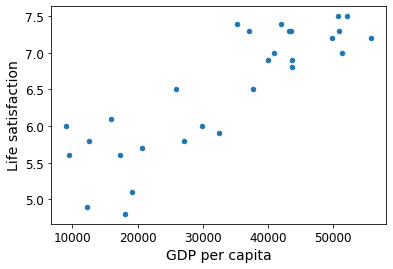

In [9]:
# Example Linear Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Load datasets
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', 
                             delimiter='\t', encoding='latin1', na_values='n/a')
# prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
# Seperate features and labels
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()


In [10]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [11]:
# Select a linear model
model = linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# make a prediction for Cyprus
x_new = [[22587]]   # GDP for Cyprus
print(model.predict(x_new))


[[5.96242338]]


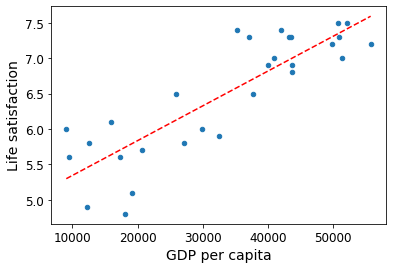

In [15]:
theta_0, theta_1 = model.intercept_[0], model.coef_[0][0]
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.plot(X, theta_0 + theta_1 * X, "r--")
plt.show()

Replacing Linear Regrssion model with K_nearest Neighbors model

In [16]:
import sklearn.neighbors

knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# train model
knn_model.fit(X, y)

# make a prediction
print(knn_model.predict(x_new))

[[5.76666667]]
